In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-13.084684406258447 134.67364701947815
-6.02902151438812 -152.95805660892896
67.49721491329305 -102.68425156453597
16.660028688624564 136.33901450202882
86.36279868706569 -171.25738493241195
-1.1696242935046826 -89.93400792716945
38.607746400761215 -84.58415286974787
54.740936718687806 -75.17387628010351
-47.100414185136856 -68.64940052936073
-52.85149753621602 -157.48495081597963
74.88197689959495 165.23454106905234
-71.87955662944096 60.07066061130581
-31.57861201138539 -130.3155871345196
20.127306191501617 21.27836823114805
-6.738031453268192 9.82311039996577
37.12465757394308 143.52973657795332
17.658146676921476 157.19894550396845
-18.701179342535013 42.68000357461992
-39.46617553869771 -101.40005166664155
22.90372962840604 -167.86558567604501
-33.46908933928808 -56.16354255897609
88.46156533111534 -109.9757035717334
-85.75264399646652 -11.984278082996838
87.39991153226345 1.9453973876020143
-72.56616919647024 141.94760739582875
-18.349537575107917 -12.59141613414917
39.3236692537

69.6625054080609 -65.70988742433707
2.1313036721441847 -150.67524212930118
40.89672784586091 75.08031708898164
-46.82755755719401 -115.03411492193993
49.07503093782455 -21.100257119371378
2.1108532459441705 -69.95891323938454
-34.07547516907052 151.99433288554917
37.84082347402267 -27.04490988574898
17.277574749259102 -108.53911835450471
43.678443966938005 161.4909995693422
-47.62315287456374 164.6171943015441
-6.669076811991971 22.741966609289392
25.172732099689327 177.2932243306874
-71.01258067382065 95.24220110191851
49.89307215809657 90.81609159344657
-85.03914698680241 42.05834428915213
-7.751528646271311 42.52295190482104
17.586505535164036 157.10003448440517
36.45425390291476 -50.04405860224412
-5.126147153379094 -139.05192519672693
4.63994433106302 31.674973802015103
23.277954705302434 82.44836892108827
-70.20428384381891 -152.50995445244607
-41.792868595869095 -85.57371418953949
-55.24989980976704 117.32508898359276
-6.816335100903558 93.42729630969222
59.59793876476769 -1.652

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | milingimbi
City not found. Skipping...
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | puerto baquerizo moreno
Processing Record 7 of Set 1 | independence
Processing Record 8 of Set 1 | chapais
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | soyo
Processing Record 16 of Set 1 | namie
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | morondava
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | dur

Processing Record 38 of Set 4 | sirnak
Processing Record 39 of Set 4 | nouakchott
Processing Record 40 of Set 4 | nkoteng
Processing Record 41 of Set 4 | nisia floresta
Processing Record 42 of Set 4 | bonfim
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | san vicente
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | tiznit
Processing Record 47 of Set 4 | green river
Processing Record 48 of Set 4 | gurgan
City not found. Skipping...
Processing Record 49 of Set 4 | buqayq
City not found. Skipping...
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | porto velho
Processing Record 2 of Set 5 | nishihara
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | merauke
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | salvador
Processing Record 8 of Set 5 | quarai
Processing Record 9 of Set 5 | marienburg
Processing Record 10 of Set 5 | vaitupu
City not found

Processing Record 26 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 27 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 28 of Set 8 | nabire
Processing Record 29 of Set 8 | porto novo
Processing Record 30 of Set 8 | adamovka
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 33 of Set 8 | ust-ilimsk
Processing Record 34 of Set 8 | mastic beach
Processing Record 35 of Set 8 | bandar-e lengeh
Processing Record 36 of Set 8 | castro marim
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | arzachena
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | drumheller
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | champua
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | lardos
Processing Record 45 of Set 8 | qandala
Processing Record 46 of Set 8 | samana
Proc

Processing Record 12 of Set 12 | sao miguel do araguaia
Processing Record 13 of Set 12 | zhaotong
Processing Record 14 of Set 12 | xining
Processing Record 15 of Set 12 | akdepe
Processing Record 16 of Set 12 | ponta delgada
Processing Record 17 of Set 12 | tandil
Processing Record 18 of Set 12 | kolokani
Processing Record 19 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | buhovo
Processing Record 22 of Set 12 | palestine
Processing Record 23 of Set 12 | xiongyue
Processing Record 24 of Set 12 | rabo de peixe
Processing Record 25 of Set 12 | turinskaya sloboda
Processing Record 26 of Set 12 | rundu
Processing Record 27 of Set 12 | vyazma
Processing Record 28 of Set 12 | husavik
Processing Record 29 of Set 12 | kisangani
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | weymouth
Processing Record 32 of Set 12 | sayyan
Processing Record 33 of Set 12 | hirtshals
Processing Record 34 of S

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.69,71,3,13.53,PF,2022-10-17 02:13:34
1,La Ronge,55.1001,-105.2842,35.85,55,81,10.36,CA,2022-10-17 02:13:35
2,Airai,-8.9266,125.4092,77.86,40,26,2.80,TL,2022-10-17 02:13:35
3,Puerto Baquerizo Moreno,-0.9000,-89.6000,67.37,79,94,13.85,EC,2022-10-17 02:13:36
4,Independence,39.0911,-94.4155,55.49,49,0,14.97,US,2022-10-17 02:13:36
5,Chapais,49.7834,-74.8492,39.02,87,100,4.68,CA,2022-10-17 02:13:37
6,Comodoro Rivadavia,-45.8667,-67.5000,40.86,93,0,6.91,AR,2022-10-17 02:12:45
7,Mataura,-46.1927,168.8643,56.48,44,100,4.61,NZ,2022-10-17 02:10:30
8,Bilibino,68.0546,166.4372,0.61,95,49,1.45,RU,2022-10-17 02:13:38
9,Rikitea,-23.1203,-134.9692,68.74,63,1,17.11,PF,2022-10-17 02:13:38


In [10]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2022-10-17 02:13:34,-16.4833,-151.7500,78.69,71,3,13.53
1,La Ronge,CA,2022-10-17 02:13:35,55.1001,-105.2842,35.85,55,81,10.36
2,Airai,TL,2022-10-17 02:13:35,-8.9266,125.4092,77.86,40,26,2.80
3,Puerto Baquerizo Moreno,EC,2022-10-17 02:13:36,-0.9000,-89.6000,67.37,79,94,13.85
4,Independence,US,2022-10-17 02:13:36,39.0911,-94.4155,55.49,49,0,14.97
5,Chapais,CA,2022-10-17 02:13:37,49.7834,-74.8492,39.02,87,100,4.68
6,Comodoro Rivadavia,AR,2022-10-17 02:12:45,-45.8667,-67.5000,40.86,93,0,6.91
7,Mataura,NZ,2022-10-17 02:10:30,-46.1927,168.8643,56.48,44,100,4.61
8,Bilibino,RU,2022-10-17 02:13:38,68.0546,166.4372,0.61,95,49,1.45
9,Rikitea,PF,2022-10-17 02:13:38,-23.1203,-134.9692,68.74,63,1,17.11


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

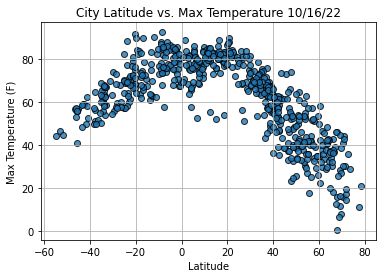

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

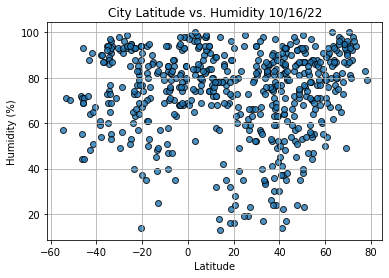

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

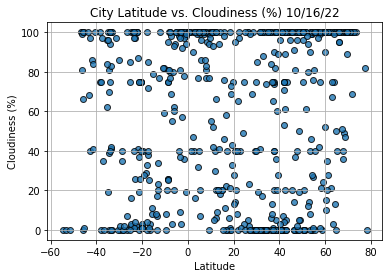

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

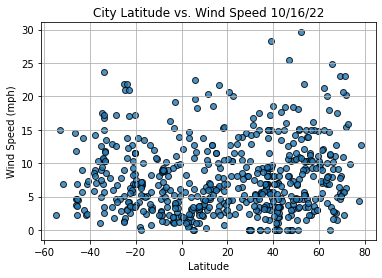

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

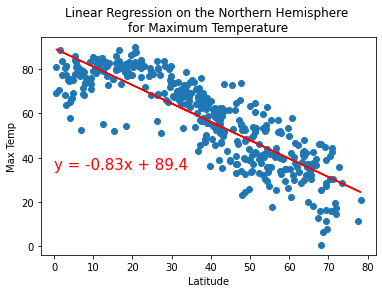

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(0,35))

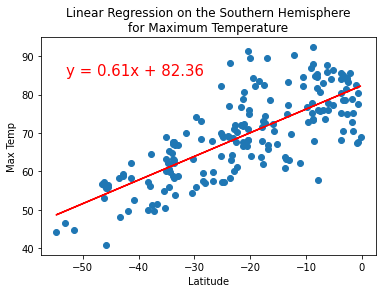

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n'
                        'for Maximum Temperature', 'Max Temp',(-53,85))

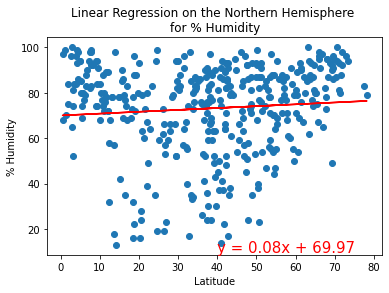

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

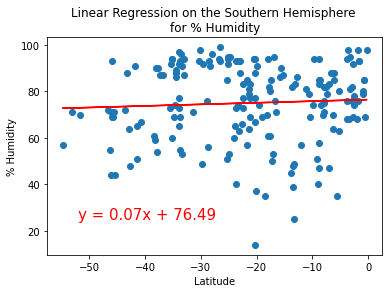

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-52,25))

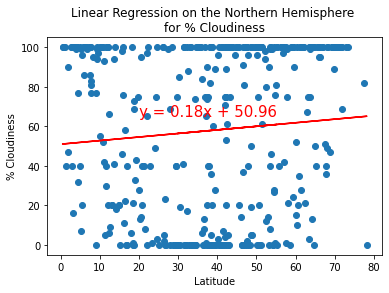

In [23]:
# Linear regression on the Northern Hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(20,65))

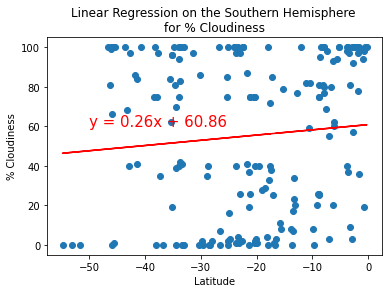

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

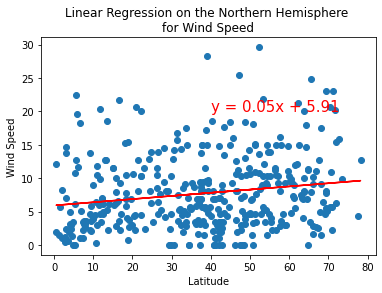

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,20))

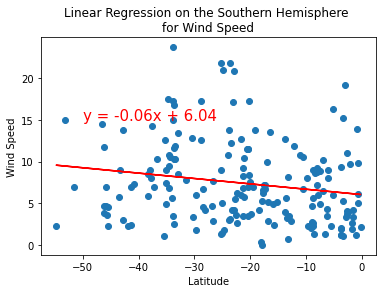

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,15))